In [1]:
import cv2;


In [ ]:
from deepface import DeepFace

In [2]:
img=cv2.imread('happyboy.jpg')

In [3]:
import matplotlib.pyplot as plt

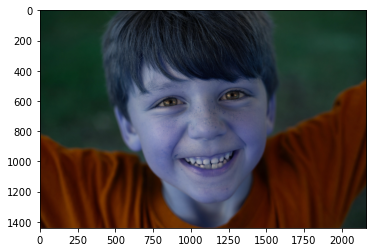

In [4]:
plt.imshow(img)

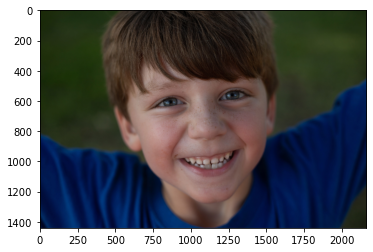

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
prediction=DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.82s/it]


In [9]:
prediction


{'emotion': {'angry': 0.07393578998744488,
  'disgust': 2.1658758342368856e-06,
  'fear': 0.04349172813817859,
  'happy': 0.5299847573041916,
  'sad': 99.14742708206177,
  'surprise': 4.3860261200734385e-06,
  'neutral': 0.20515492651611567},
 'dominant_emotion': 'sad',
 'region': {'x': 528, 'y': 210, 'w': 1041, 'h': 1041},
 'age': 31,
 'gender': 'Woman',
 'race': {'asian': 19.826073071232667,
  'indian': 19.54335188348867,
  'black': 17.274739769132164,
  'white': 10.50240868301288,
  'middle eastern': 9.347787130142793,
  'latino hispanic': 23.50563424758503},
 'dominant_race': 'latino hispanic'}

In [10]:
prediction['dominant_emotion']

'sad'

In [17]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [85]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces=faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y), (x+w,y+h), (0,255,0), 2);

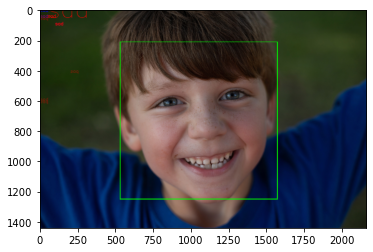

In [86]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [ ]:
font=cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, prediction['dominant_emotion'], (0,600),font, 1, (0,0,255), 1, cv2.LINE_4);

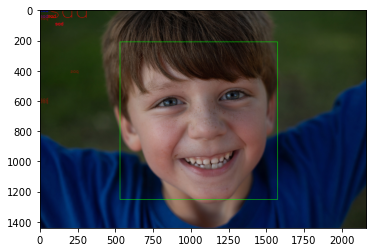

In [84]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [87]:
img=cv2.imread('sadboy.jpg')

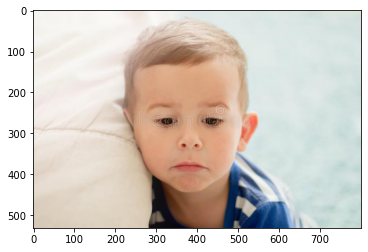

In [88]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [89]:
prediction=DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.37s/it]


In [90]:
prediction['dominant_emotion']

'neutral'

In [91]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [92]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces=faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y), (x+w,y+h), (0,255,0), 2);

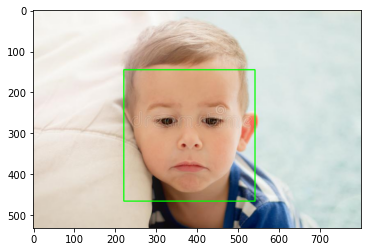

In [93]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [94]:
font=cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, prediction['dominant_emotion'], (0,100),font, 1, (0,0,255), 1, cv2.LINE_4);

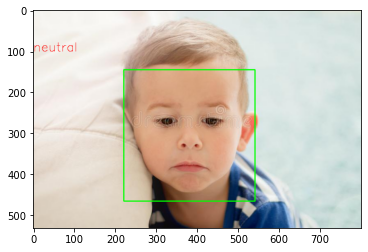

In [95]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [6]:
import cv2
from deepface import DeepFace
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)
#To check if the webcam is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame=cap.read()
    if frame is None:
        raise ValueError('Unable to get a frame!')
    result=DeepFace.analyze(frame, actions=['emotion'])
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    #Draw a rectangle around the faces 
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h), (0,255,0),2)
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putText() method for inserting text on video
    cv2.putText(frame,result['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Demo video', frame)
    
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()
    

ValueError: Unable to get a frame!